In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('clean_dataset1')

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df=df.drop(['day','month','year'],axis=1)

In [29]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),1,0)

In [35]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
def correlation(dataset, threshold):
  corr_matrix = dataset.corr().abs()
  cols = corr_matrix.columns
  col_corr = set()

  for i in range(len(cols)):
    for j in range(i+1, len(cols)):
      if corr_matrix.iloc[i, j] > threshold:
        colname = corr_matrix.columns[i]  # Corrected: Use `i` instead of `I`
        col_corr.add(colname)

  return col_corr

In [55]:
corr_features=correlation(X_train,0.85)

In [57]:
corr_features

{'DC', 'DMC'}

In [59]:
X_train.drop(corr_features,inplace=True,axis=1)
X_test.drop(corr_features,inplace=True,axis=1)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train.shape,X_test.shape

((194, 9), (49, 9))

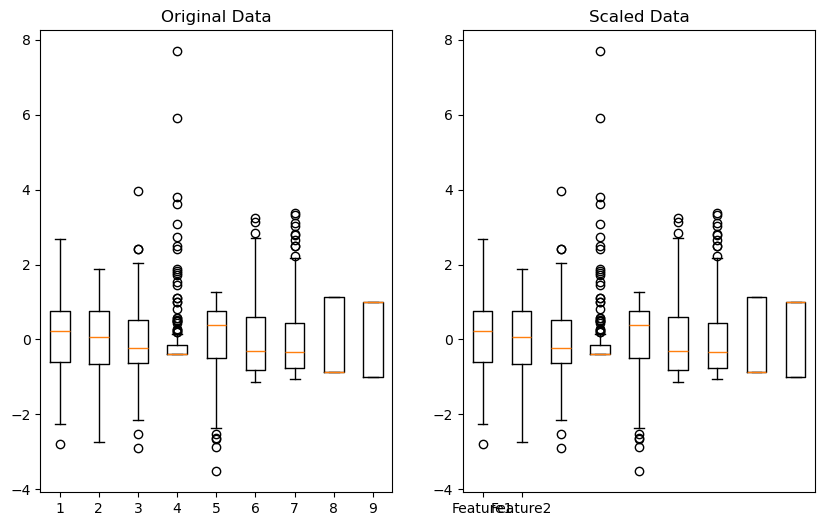

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample data with different scales
data = X_train


# Create a box plot of the original data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Original Data')


# Create a box plot of the scaled data
plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled)
plt.title('Scaled Data')
plt.xticks([1, 2], ['Feature1', 'Feature2'])

plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Mean Squared error",mse)
print("Root Mean error",rmse)
print("Score",score)

Mean absolute error 0.4342430115498618
Mean Squared error 0.35537047400037786
Root Mean error 0.5961295781961987
Score 0.9882748603682521


## Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=Lasso()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Mean Squared error",mse)
print("Root Mean error",rmse)
print("Score",score)

Mean absolute error 0.898561733307811
Mean Squared error 1.2588155352665396
Root Mean error 1.1219694894543877
Score 0.9584664765323243


### Ridge Regression

Mean absolute error 0.44393393008816323
Mean Squared error 0.3633041494273245
Root Mean error 0.6027471687426864
Score 0.9880130956495157


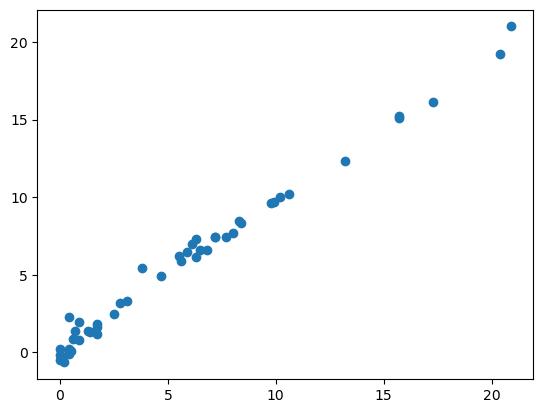

In [85]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=Ridge()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Mean Squared error",mse)
print("Root Mean error",rmse)
print("Score",score)
plt.scatter(y_test,y_pred)

In [87]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

mean absolute 0.42052445441075653
score 0.9887202239815966


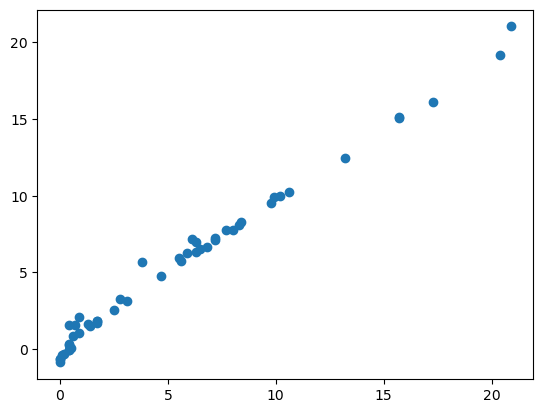

In [89]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute",mse)
print("score",score)


In [91]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

mean absolute 0.44393393008816323
score 0.9880130956495157


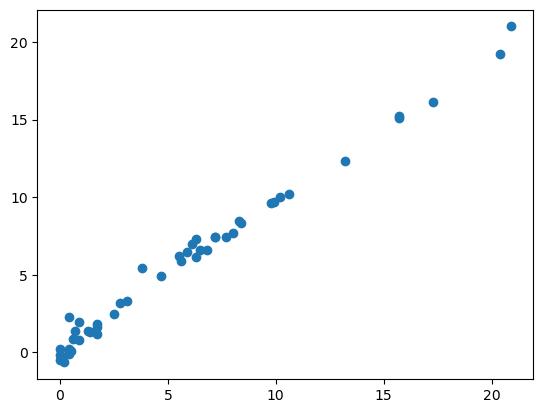

In [93]:
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute",mse)
print("score",score)


## Elastic Net Regressor

Mean absolute error 1.6463621150999617
Mean Squared error 3.7764966074272364
Root Mean error 1.9433210253139435
Score 0.8753977798367691


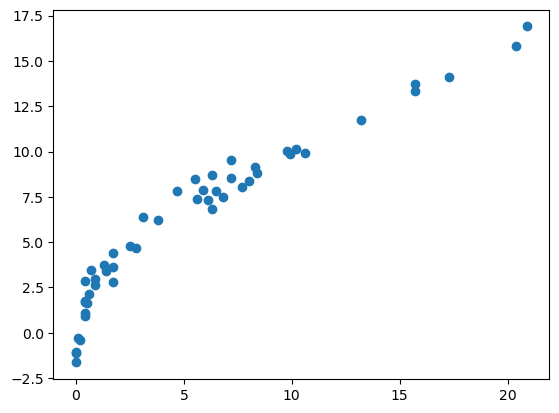

In [96]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=ElasticNet()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Mean Squared error",mse)
print("Root Mean error",rmse)
print("Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.46281506745033785
Mean Squared error 0.37569864470488884
Root Mean error 0.6129426112654339
Score 0.9876041500605405


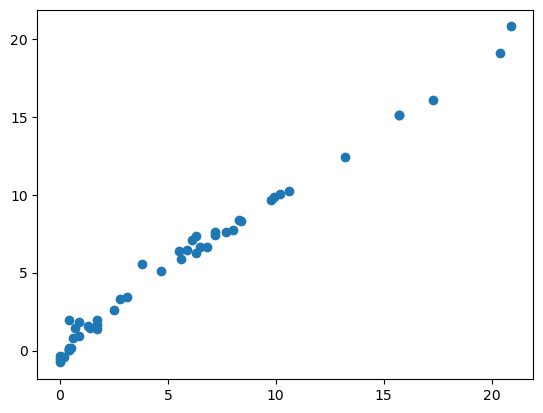

In [104]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elasticCV=ElasticNetCV()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("Mean Squared error",mse)
print("Root Mean error",rmse)
print("Score",score)
plt.scatter(y_test,y_pred)

In [100]:
import pickle

In [102]:
scaler

StandardScaler()

In [106]:
elasticCV

ElasticNetCV()

In [108]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(elasticCV,open('elasticCV.pkl','wb'))